In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
# データを読み込む
df = pd.read_csv('./data/feature/feature.csv')
df = df.drop('得意先コード', axis=1)

In [3]:
# クラスタリング
sc = StandardScaler() #データの標準化
clustering_sc = sc.fit_transform(df)
kmeans = KMeans(n_clusters=5, random_state=0)
clusters = kmeans.fit(df)
df['cluster'] = clusters.labels_

/Users/yamazakikoushi/.pyenv/versions/3.10.4/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [4]:
# PCAでデータを2次元に削減する
x = clustering_sc
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = df['cluster'].values

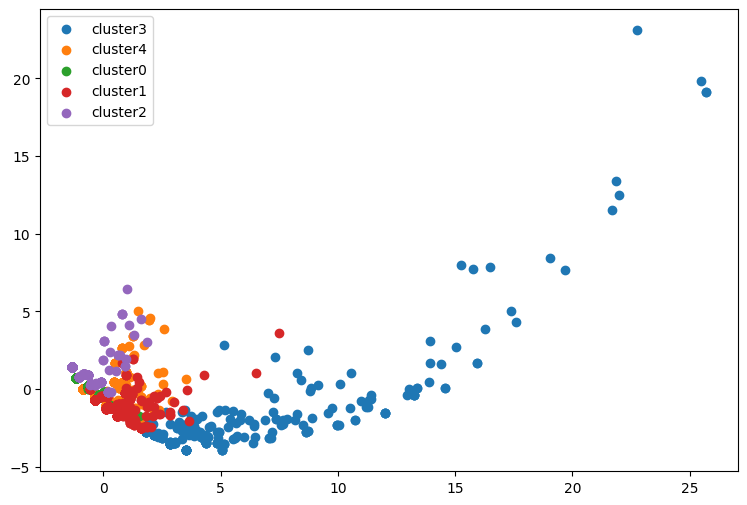

In [5]:
fig = plt.figure(figsize = (9, 6))
for i in pca_df['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1], label=f'cluster{i}')

# 各要素にDataFrameのインデックスの数字をラベルとして付ける
plt.legend()
plt.show()